In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.ensemble import AdaBoostClassifier
%matplotlib inline

In [2]:
df = pd.read_csv("A2_data.csv")

In [3]:
# # drop row 79543
df = df.drop(79543, axis=0)

In [4]:
# unique classes
print(df['class'].unique())

labels = df['class']
# drop the class column
df = df.drop(['class','field_ID','plate'], axis=1)



['GALAXY' 'QSO' 'STAR']


In [5]:
df.head()

,alpha,delta,u,g,r,i,z,MJD,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,56064,-0.001584
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,53727,-0.824700
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,54883,-0.418000
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,51783,5.953000
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,56069,0.846000


t-SNE

In [6]:
# apply t-SNE
scaler = StandardScaler()

tsne = TSNE(n_components=2, perplexity=50)
scaled = scaler.fit_transform(df)
transformed = tsne.fit_transform(scaled)

c:\Users\KYRIAKOS ARISTIDOU\anaconda3\envs\deeplearning\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\KYRIAKOS ARISTIDOU\anaconda3\envs\deeplearning\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [7]:
transformed_TSNE = pd.DataFrame(transformed, columns=['TSNE1', 'TSNE2'])
key=transformed_TSNE.keys()
transformed_TSNE

,TSNE1,TSNE2
0,-13.124188,18.121052
1,18.353600,10.801064
2,-7.983959,7.746363
3,27.650032,16.775049
4,35.678841,-8.026567
...,...,...
99994,29.786926,-23.556627
99995,17.601746,-9.712240
99996,-39.076401,3.721143
99997,6.833021,0.486013


Adaboost

In [8]:
#split the dataset
x_train, x_test, y_train, y_test = train_test_split(transformed_TSNE, labels, test_size=0.3, random_state=123, stratify=labels)


In [9]:
# clf = AdaBoostClassifier(random_state=123)

Hyperparameter Optimisation

In [10]:
# parameters = {
#     'n_estimators': [5,10,20,30,50,70],
#     'learning_rate': [0.1,0.3,0.5,0.8,1],
#     'algorithm': ['SAMME', 'SAMME.R']
# }
# gr_ada = GridSearchCV(clf, parameters, cv=5, verbose=2, n_jobs=-1)
# gr_ada.fit(x_train, y_train)

In [11]:
# gr_ada.best_params_

In [12]:
clf = AdaBoostClassifier(
    algorithm = 'SAMME.R',
    learning_rate = 0.8,
    n_estimators = 70
)
clf.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=70)

Test and Evaluation

In [13]:
from sklearn.metrics import accuracy_score, f1_score

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
sortedlabels = clf.classes_

In [14]:
print('features importances are : ' , clf.feature_importances_)

features importances are :  [0.44285714 0.55714286]


<BarContainer object of 2 artists>

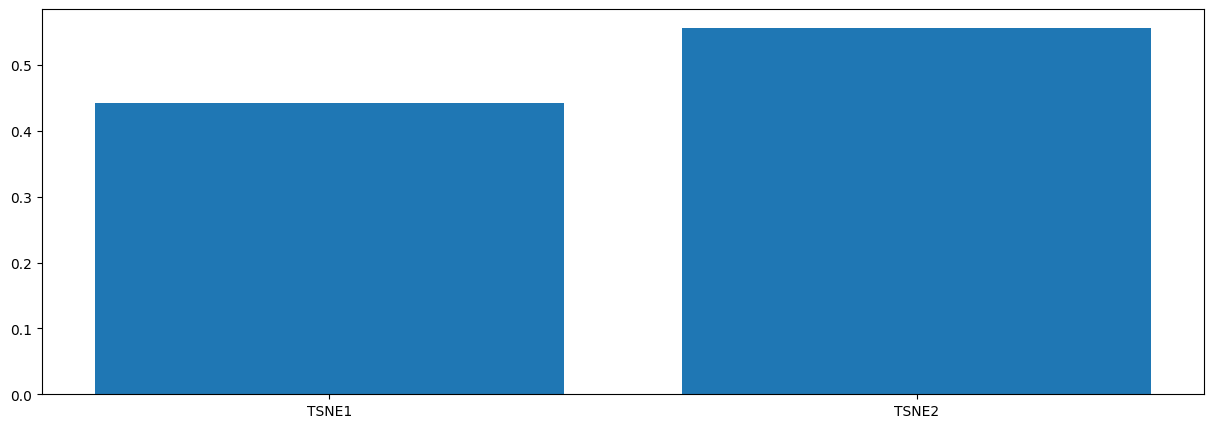

In [15]:
#Visualize feature importance

plt.figure(figsize=(15,5))
plt.bar(key,clf.feature_importances_)

In [16]:
y_pred = clf.predict(x_test)
sortedlabels = clf.classes_

Classification report and confusion matrix

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(cm)

              precision    recall  f1-score   support

      GALAXY       0.67      0.91      0.77     17834
         QSO       0.52      0.46      0.49      5688
        STAR       0.39      0.05      0.09      6478

    accuracy                           0.64     30000
   macro avg       0.53      0.47      0.45     30000
weighted avg       0.58      0.64      0.57     30000

[[16204  1276   354]
 [ 2915  2634   139]
 [ 5017  1150   311]]


Visualization of Confusion Matrix

Text(43.25, 0.5, 'True')

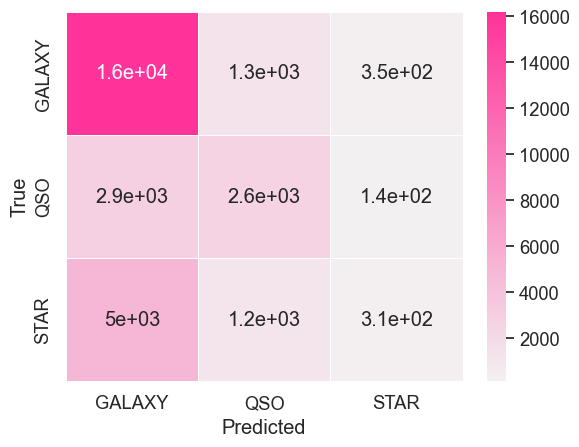

In [18]:
cm = pd.DataFrame(cm, index=sortedlabels, columns=sortedlabels)
sns.set(font_scale=1.2)
sns.heatmap(cm, linewidths=0.5, cmap=sns.light_palette((1, 0.2, 0.6),n_colors=10000), annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')